In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
import json
import sys
sys.path.append('../bgc-analysis')
from  calc_sensor import pH_sbe, o2_sbe
import numpy as np
from datetime import datetime
from db_api import get_cal,get_continuous_one_profile,get_continuous_one_float
from calc_sensor import pH_sbe
import openpyxl

In [182]:
wmo = "8" #UPDATE FOR EACH FLOAT
SN = 1528       #UPDATE FOR EACH FLOAT
#whichtest = 'valve' #PICK PUMP OR VALVE
meta = get_cal(wmo)
meta

,CTD_CNDC,CTD_PRES,CTD_TEMP,OPTODE_DOXY,FLUOROMETER_CDOM,FLUOROMETER_CHLA,BACKSCATTERINGMETER_BBP700,SPECTROPHOTOMETER_NITRATE,TRANSISTOR_PH
SENSOR_MAKER,SBE,DRUCK,SBE,SBE,WETLABS,WETLABS,WETLABS,SATLANTIC,SBE
SENSOR_MODEL,SBE41CP_V5.3.5,DRUCK_2900PSIA,SBE41CP_V5.3.5,SBE63_V3.2.2,MCOMS_FLBBCD,MCOMS_FLBBCD,MCOMS_FLBBCD,SUNA_V2,SEAFET
SENSOR_SERIAL_NO,18947,12263199,18947,3419,419,419,419,2068,720-12256
SENSOR_CALIB_DATE,2023-03-12,2023-03-16,2023-03-12,2023-03-08,None,None,None,None,2023-03-14
COMMENTS,None,None,None,None,,,,None,REF SN: 12246; added calibration date; added K0
PREDEPLOYMENT_CALIB_EQUATION,{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None}
PREDEPLOYMENT_CALIB_COEFFICIENT,"{'G': -1.01677, 'H': 0.1431673, 'I': -0.000169...","{'PA0': 0.2982393, 'PA1': 0.0003909299, 'PA2':...","{'TA0': -0.0008992448, 'TA1': 0.0003029106, 'T...","{'E': 0.011, 'A0': 1.0513, 'A1': -0.0015, 'A2'...","{'DARK_CDOM': 50, 'SCALE_CDOM': 0.04084}","{'DARK_CHLA': 49, 'SCALE_CHLA': 0.002349}","{'KHI': 1.097, 'BETASW700': 'calculated at 124...","{'NO3': [-0.00022323, 0.00585584, 0.00472827, ...","{'F0': -1.332894357998, 'F1': 8.811211536684e-..."


In [183]:
cal = meta["TRANSISTOR_PH"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal
filelocation = 'G:\\Shared drives\WHOI Argo\BGC\Float Tracking\pressure_test_results\\' + 'combined_test_results' + '\\' + str(SN) + '_pressure_test_results' + ".xlsx"
dff = pd.read_excel(filelocation)


In [184]:
try:
    print(cal['K2'])
except:
    cal['K2'] = cal['K2f0']

try:
    cal['K0'] != NoneType
except:
    cal['K0'] = -1.32



In [185]:
(x,dff["PH_9"]) = pH_sbe(cal,dff["PH_VRS"],dff["PRES"],dff["TEMP"],dff["PSAL"])
time = dff['DATE']
time= pd.to_datetime(time)

{'F0': -1.332894357998, 'F1': 8.811211536684e-06, 'F2': 3.177334895138e-08, 'F3': -1.620358269537e-10, 'F4': 3.380667969259e-13, 'F5': -4.034618512297e-16, 'F6': 2.925365028399e-19, 'F7': -1.27083230314e-22, 'F8': 3.039055705211e-26, 'F9': -3.073746569948e-30, 'K0': -1.32, 'K2f0': -0.00086924, 'K2f1': -3.5215e-08, 'K2f2': 3.4481e-11, 'K2f3': -1.2983e-14, 'K2': -0.00086924}


Text(0.5, 0, 'pH Value')

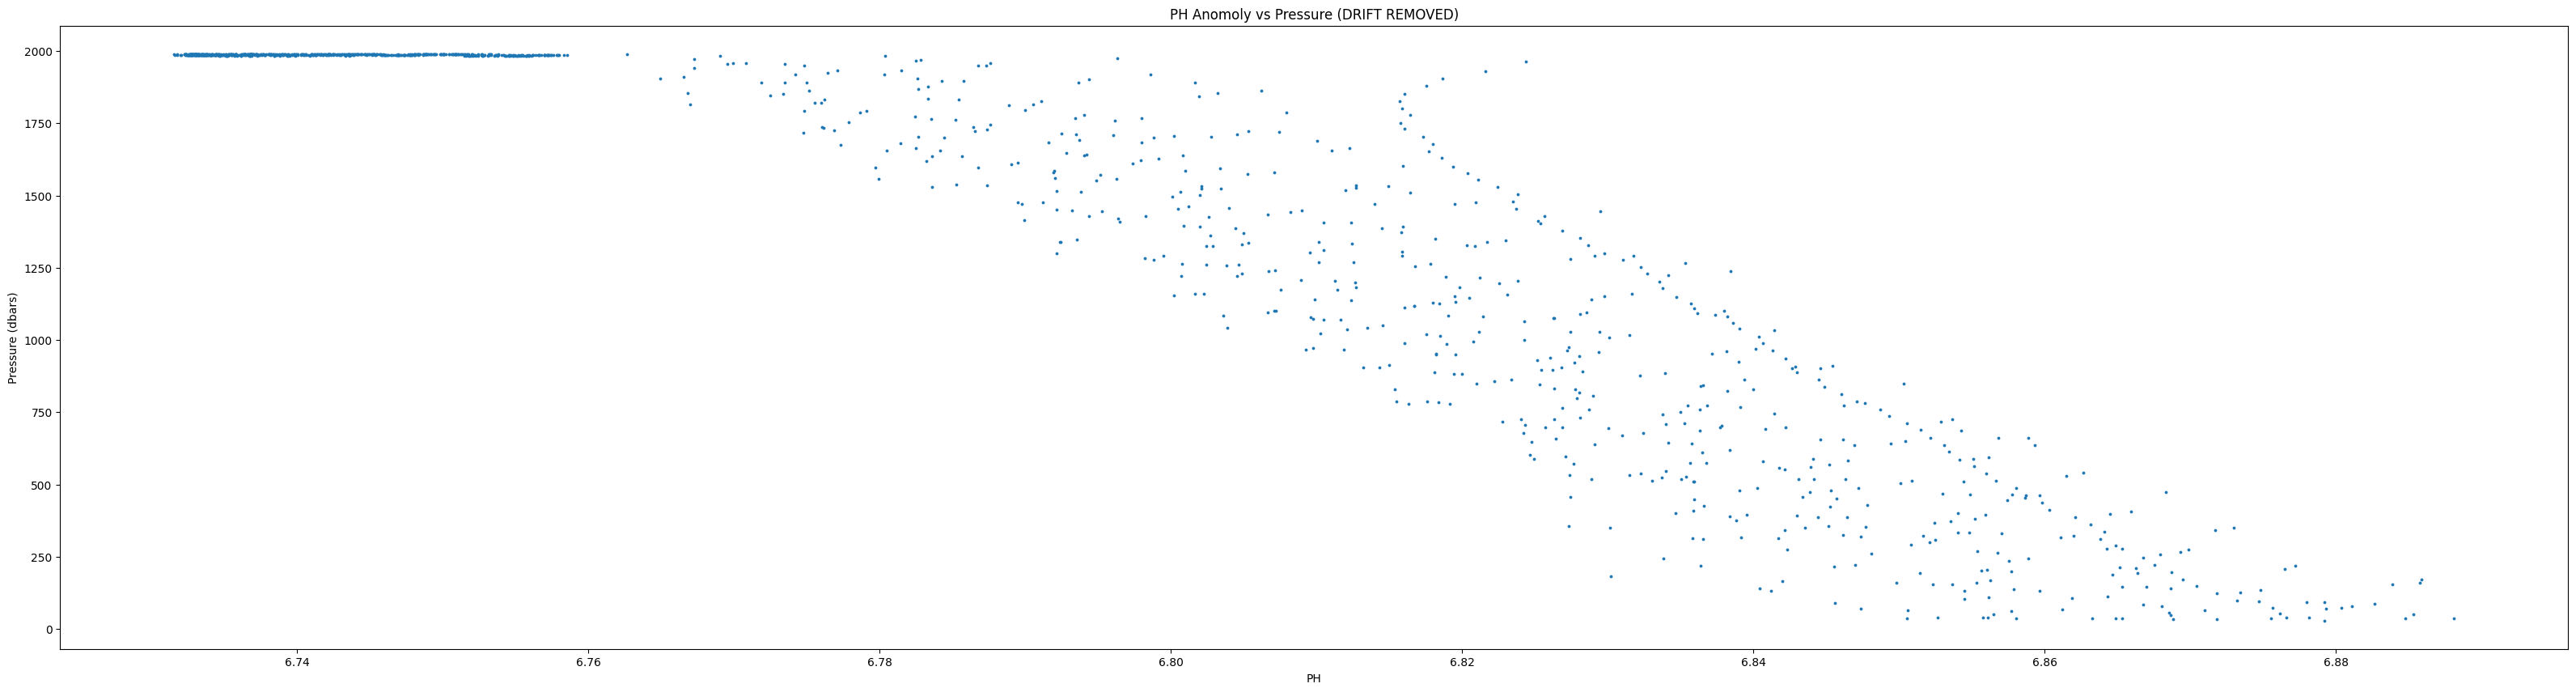

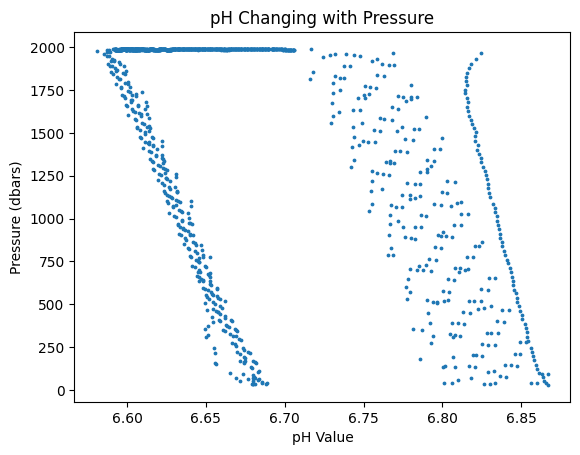

In [186]:
pressure = dff['PRES']
pH = []
for i, pressures in enumerate(pressure):
    if pressure[i] > 1800:
        pH.append(x[i])
    else:
        pass

y = list(range(0,len(x)))
phslope,b = np.polyfit(y, x, 1)
phslope = float(phslope)
xx = []
for yy in y:
    xx.append(yy*phslope)
phanom = []
for j, anom in enumerate(xx):
    phanom.append(x[j]-xx[j])
#plt.plot(y,xx)
fig1 =plt.figure()
plt.scatter(phanom,pressure, s=3)
fig1.set_figheight(10)
fig1.set_figwidth(40)
plt.title('PH Anomoly vs Pressure (DRIFT REMOVED)')
plt.ylabel('Pressure (dbars)')
plt.xlabel('PH')
figure()
fig2 = plt.scatter(x,pressure,s=3)
plt.title('pH Changing with Pressure')
plt.ylabel('Pressure (dbars)')
plt.xlabel('pH Value')
